In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import sys
import pandas as pd
from collections import defaultdict, deque
from IPython.display import display

In [3]:
class BostonGraph():
    """
    A class that creates a graph network to be used with Dijkstras Algorithm
    """
    
    def __init__(self, nodes):
        """
        A constructor that creates an instance of a graph using one
        argument for the number of nodes
        """
        self.nodes = set(range(1, nodes))
        self.edges = {}
        self.edge_distances = {}

    def add_new_edge(self, source_node, destination_node, distance):
        """
        A function that adds a new edge to the graph network
        @input source_node: The node from which the edge starts
        @input destination_node: The node from which the edge ends
        @input distance: The weight of the node that represents distance      
        """
        self.helper_add_edge(source_node, destination_node, distance)
        self.helper_add_edge(destination_node, source_node, distance)

    def helper_add_edge(self, source_node, destination_node, distance):
        """
        A helper function that adds a new edge to the graph network
        @input source_node: The node from which the edge starts
        @input destination_node: The node from which the edge ends
        @input distance: The weight of the node that represents distance      
        """
        self.edges.setdefault(source_node, [])
        self.edges[source_node].append(destination_node)
        self.edge_distances[(source_node, destination_node)] = distance


def apply_dijkstra(Graph, source_node):
    """
    A function that applies Dijkstras algorithm to a given network
    
    @input Graph: The graph network that the algorithm should be applied to
    @input source_node: The node from which the edge starts
    """
    
    # Define the nodes that were visited, and the current node
    visited = {source_node: 0}
    current_node = source_node
    spec_path = {}

    # Set the nodes
    nodes = set(Graph.nodes)

    # Enter while condition to start
    while nodes:
        min_node = None
        # Iterate over the nodes to check if visited
        for node in nodes:
            if node in visited:
                if min_node is None:
                    min_node = node
                elif visited[node] < visited[min_node]:
                    min_node = node

        if min_node is None:
            break

        nodes.remove(min_node)
        cur_wt = visited[min_node]

        # Iterate over the edges
        for edge in Graph.edges[min_node]:
            wt = cur_wt + Graph.edge_distances[(min_node, edge)]
            # Set if condition of visited not met
            if edge not in visited or wt < visited[edge]:
                visited[edge] = wt
                spec_path[edge] = min_node

    return visited, spec_path

def create_new_route(graph, start, end):
    """
    Function that creates a route or path by applying Dijkstras
    """
    distances, paths = apply_dijkstra(graph, start)
    route = [end]
    distance = distances[end]

    # Enter while loop to add paths to route
    while end != start:
        route.append(paths[end])
        end = paths[end]

    # Inverse to correct for order
    route.reverse()
    
    return route, distance

def print_full_path(graph, start,end):
    """
    Function that graphically shows the route
    """
    # Call the create new route function
    full_route = create_new_route(graph, start,end)
    
    # Print the route
    print(full_route)
        

In [4]:
edges_path = "/content/drive/MyDrive/NEU/CS5800/data/boston_traced_map_norm.csv"
edges_df = pd.read_csv(edges_path)
edges_df["color"] = "black"
edges_df[:5]

,s,d,w,color
0,0,1,11,black
1,1,2,12,black
2,2,3,11,black
3,0,4,14,black
4,3,0,10,black


In [15]:
nodes_path = "/content/drive/MyDrive/NEU/CS5800/data/boston_nodes_norm.csv"
nodes_df = pd.read_csv(nodes_path)
nodes_df

,Node,Interesting
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,1
6,6,1
7,7,1
8,8,0
9,9,0


In [16]:
interesting_nodes = nodes_df[nodes_df["Interesting"]==1].reset_index()[["Node","Interesting"]]
interesting_nodes

,Node,Interesting
0,5,1
1,6,1
2,7,1
3,21,1
4,22,1
5,26,1
6,31,1


In [17]:
import random
# get source
source_node = random.randint(0, len(nodes_df)-1)
source_node = 24

In [18]:
color_map = nodes_df["Interesting"].apply(lambda x: 'red' if x==1 else "blue")
color_map[source_node] = "green"
color_map

0      blue
1      blue
2      blue
3      blue
4      blue
5       red
6       red
7       red
8      blue
9      blue
10     blue
11     blue
12     blue
13     blue
14     blue
15     blue
16     blue
17     blue
18     blue
19     blue
20     blue
21      red
22      red
23     blue
24    green
25     blue
26      red
27     blue
28     blue
29     blue
30     blue
31      red
32     blue
33     blue
Name: Interesting, dtype: object

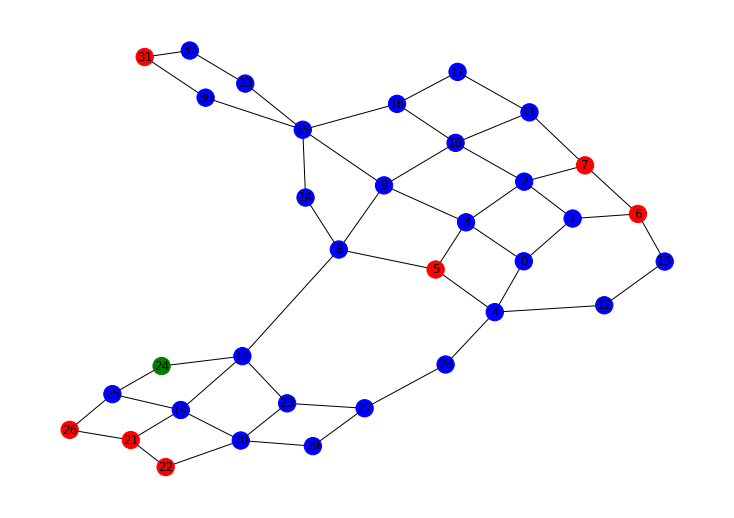

In [21]:
# Color the interesting nodes red
color_map = nodes_df["Interesting"].apply(lambda x: 'red' if x==1 else "blue")
color_map[source_node] = "green"

G = nx.Graph()

# Add nodes
for i in range(len(nodes_df)):
  node = nodes_df.iloc[i]
  G.add_node(node["Node"])

for row in edges_df.values:
  G.add_edge(row[0],row[1], weight=row[2])

plt.figure(figsize=(10, 7))
nx.draw(G, with_labels=True, node_color=color_map)
plt.show()

In [22]:
# Create new graph
g = BostonGraph(len(nodes_df))
    
# Iterate over CSV and populate graph
for row in edges_df.values:
    g.add_new_edge(row[0], row[1], row[2])

create_new_route(g, 1, 22)

([1, 2, 10, 9, 8, 18, 19, 20, 22], 75)

In [23]:
# Create new graph based on the interesting places and the source
final_nodes = interesting_nodes.append(nodes_df[nodes_df["Node"]==source_node]).reset_index()[["Node","Interesting"]].drop_duplicates()
final_nodes

,Node,Interesting
0,5,1
1,6,1
2,7,1
3,21,1
4,22,1
5,26,1
6,31,1
7,24,0


In [24]:
final_edges_df = pd.DataFrame(columns=["s","d","w"])
# create edges of interesting nodes and source
s = []
d = []
w = []

reduced_routes = {}

for i in range(len(final_nodes)):
  for j in range(i+1,len(final_nodes)):
    start = final_nodes.iloc[i]["Node"]
    end = final_nodes.iloc[j]["Node"]

    # Djikstra's algorithm to find routes
    route, distance = create_new_route(g, start, end)
    key = str(start) + "-" +  str(end)
    reduced_routes[key] = route
    s.append(start)
    d.append(end)
    w.append(distance)

final_edges_df["s"] = s
final_edges_df["d"] = d
final_edges_df["w"] = w
final_edges_df["route"] = len(final_edges_df) 

# Sort edges ascending by distance
final_edges_df = final_edges_df.sort_values(by=["w"]).reset_index()[["s","d","w","route"]]
final_edges_df[:5]

,s,d,w,route
0,6,7,10,28
1,21,26,11,28
2,21,22,16,28
3,26,24,20,28
4,5,24,26,28


In [25]:
nodes_color_map = final_nodes["Node"].apply(lambda x: 'red' if x!=source_node else "green")
nodes_color_map

0      red
1      red
2      red
3      red
4      red
5      red
6      red
7    green
Name: Node, dtype: object

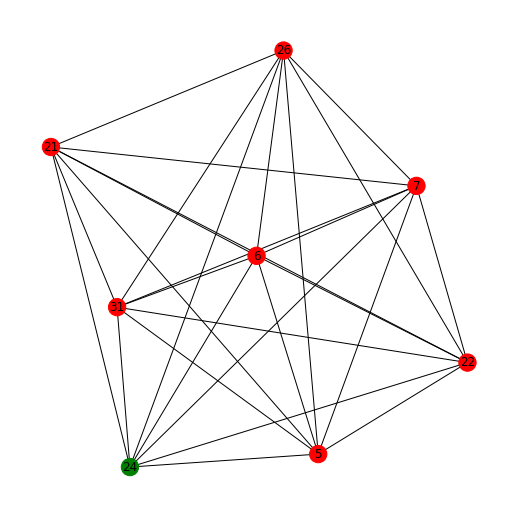

In [26]:
# reduced graph
final_G = nx.Graph()

# Add nodes
for i in range(len(final_nodes)):
  node = final_nodes.iloc[i]
  final_G.add_node(node["Node"])

# Add edges
for row in final_edges_df.values:
    final_G.add_edge(row[0],row[1], weight=row[2])

plt.figure(figsize=(7, 7))  
nx.draw(final_G, with_labels=True, node_color=nodes_color_map)

plt.show()

In [27]:
# Greedy Approach
distance = 100
tolerance = 0.1*distance
current_distance = 0
current_node = source_node
current_route_index = 0
index = final_edges_df.index
edges_len = len(final_edges_df)
visited_nodes = [source_node]

# Greedy Approach
while True:
  before = current_distance
  for i in range(edges_len):
    edge = final_edges_df.iloc[i]

    if edge["s"] == current_node and edge["route"] == edges_len and edge["d"] not in visited_nodes \
    and current_distance + edge["w"] <= distance:
      final_edges_df.at[index[i], "route"] = current_route_index
      current_route_index += 1
      current_node = edge["d"]
      current_distance += edge["w"]
      visited_nodes.append(current_node)
      break
    elif edge["d"] == current_node and edge["route"] == edges_len and edge["s"] not in visited_nodes \
    and current_distance + edge["w"] <= distance:
      final_edges_df.at[index[i], "route"] = current_route_index
      current_route_index += 1
      current_node = edge["s"]
      current_distance += edge["w"]
      visited_nodes.append(current_node)
      break
    
  if before == current_distance:
    break

final_edges_df = final_edges_df.sort_values(by="route").reset_index()[["s","d","w","route"]]
final_edges_df["color"] = final_edges_df["route"].apply(lambda x: 'green' if x!=edges_len else "black")
final_edges_df[:10]

,s,d,w,route,color
0,26,24,20,0,green
1,21,26,11,1,green
2,21,22,16,2,green
3,5,22,43,3,green
4,6,7,10,28,black
5,6,26,73,28,black
6,22,31,67,28,black
7,26,31,65,28,black
8,21,31,65,28,black
9,7,22,65,28,black


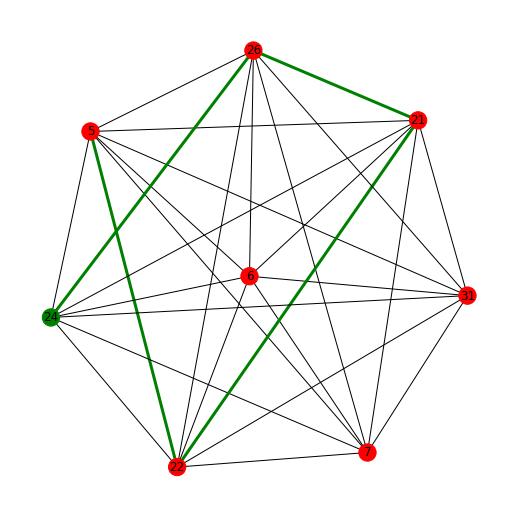

In [28]:
 # reduced graph
route_G = nx.Graph()

# Add nodes
for i in range(len(final_nodes)):
  node = final_nodes.iloc[i]
  route_G.add_node(node["Node"])

# Add edges
for row in final_edges_df.values:
  route_G.add_edge(row[0],row[1])

edges_color_map = []
for e in route_G.edges():
  for row in final_edges_df.values:
    if e[0] == row[0] and e[1] == row[1]:
      edges_color_map.append(row[4])

edges_width_map = []
for e in route_G.edges():
  for row in final_edges_df.values:
    if e[0] == row[0] and e[1] == row[1]:
      if row[4] == "green":
        edges_width_map.append(3)
      else:
        edges_width_map.append(1)

plt.figure(figsize=(7, 7))  
nx.draw(route_G, with_labels=True, node_color=nodes_color_map, edge_color=edges_color_map, width=edges_width_map)
plt.show()

In [29]:
final_edges_df

,s,d,w,route,color
0,26,24,20,0,green
1,21,26,11,1,green
2,21,22,16,2,green
3,5,22,43,3,green
4,6,7,10,28,black
5,6,26,73,28,black
6,22,31,67,28,black
7,26,31,65,28,black
8,21,31,65,28,black
9,7,22,65,28,black


In [30]:
reconstruct_edges = []
for route in final_edges_df[final_edges_df["route"] != edges_len].values:
  key = str(route[0]) + "-" + str(route[1])
  reduced_route = reduced_routes[key]
  print(reduced_route)
  for i in range(len(reduced_route)-1):
    reconstruct_edges.append((reduced_route[i],reduced_route[i+1]))

reconstruct_edges = set(reconstruct_edges)
reconstruct_edges

[26, 25, 24]
[21, 26]
[21, 22]
[5, 8, 18, 19, 20, 22]


{(5, 8),
 (8, 18),
 (18, 19),
 (19, 20),
 (20, 22),
 (21, 22),
 (21, 26),
 (25, 24),
 (26, 25)}

In [31]:
for edge in reconstruct_edges:
  for i in range(len(edges_df)):
    e = edges_df.iloc[i]
    if (e.s == edge[0] and e.d == edge[1]) or (e.s == edge[1] and e.d == edge[0]):
      edges_df.at[i, "color"] = "green"
  

edges_df[edges_df["color"]=="green"]

,s,d,w,color
10,5,8,10,green
27,8,18,5,green
28,18,19,10,green
29,19,20,10,green
31,21,22,16,green
32,22,20,8,green
36,24,25,12,green
38,25,26,8,green
39,26,21,11,green


In [32]:
node_color_map = nodes_df["Interesting"].apply(lambda x: 'red' if x==1 else "blue")
node_color_map[source_node] = "green"

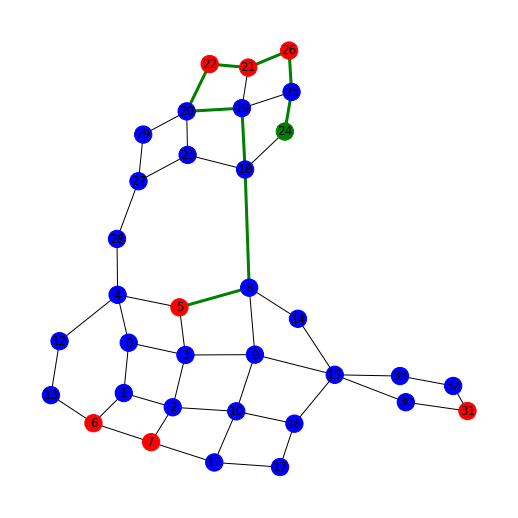

In [33]:
# Color the interesting nodes red and the source green

G = nx.Graph()
for row in edges_df.values:
    G.add_edge(row[0],row[1], weight=row[2])

edges_color_map = []
edges_width_map = []

for e in G.edges():
  for row in edges_df.values:
    if (e[0] == row[0] and e[1] == row[1]) or (e[0] == row[1] and e[1] == row[0]):
      edges_color_map.append(row[3])
      if row[3] == "green":
        edges_width_map.append(3)
      else:
        edges_width_map.append(1)
      break;


plt.figure(figsize=(7, 7))  
nx.draw(G, with_labels=True, node_color=color_map, edge_color=edges_color_map, width=edges_width_map)
plt.show()

In [22]:
final_edges_df[final_edges_df["route"] != edges_len].sort_values(by="route")["w"].sum()


90